# Fourier Transform

####  Fourier Transform: The Fourier Transform (FT) is a mathematical technique used to transform signals from the time domain into the frequency domain. It helps in analyzing the frequency components of signals.
####  Key Concepts:
####  Continuous Fourier Transform (CFT): For continuous signals.
####  Discrete Fourier Transform (DFT): For discrete signals.
####  Fast Fourier Transform (FFT): An efficient algorithm to compute the DFT.

# Analog to Digital Conversion (ADC)

#### ADC is the process of converting continuous analog signals into a digital representation.

#### Sampling: Taking discrete samples of the analog signal at a defined sampling rate (Nyquist rate: at least twice the highest frequency of the signal).
#### Quantization: Approximating each sample to the nearest value within a finite set of possible values.
####  Encoding: Converting the quantized values into binary format.

# ECG Signal Processing

#### Electrocardiogram (ECG) signals are critical for monitoring heart activity. Signal processing techniques, including the Fourier Transform, are used for analyzing these signals.
#### Common Techniques:
#### Filtering (e.g., band-pass filters to isolate heartbeats)
#### Feature extraction (e.g., R-peaks detection)
#### Classification (using machine learning)

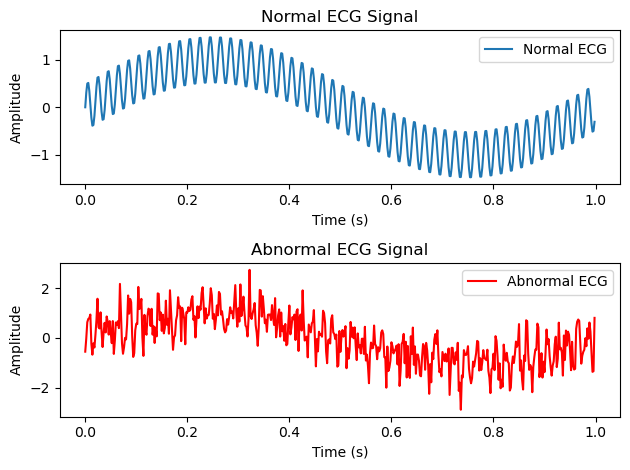

Epoch 1/10


/Users/ohajati/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8263 - loss: 0.3584 - val_accuracy: 1.0000 - val_loss: 2.3776e-04
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 1.0000 - loss: 1.2497e-04 - val_accuracy: 1.0000 - val_loss: 2.9002e-05
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 1.0000 - loss: 2.1142e-05 - val_accuracy: 1.0000 - val_loss: 1.3799e-05
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.0834e-05 - val_accuracy: 1.0000 - val_loss: 8.7481e-06
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 1.0000 - loss: 7.6841e-06 - val_accuracy: 1.0000 - val_loss: 5.9051e-06
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 1.0000 - loss: 5.0304e-06 - val_accuracy: 1.0000 - val_loss: 4.2656e-06
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 1.0000 - loss: 3.9453e-06 - val_accuracy: 1.0000 - val_loss: 3.2637e-06
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 1.0

In [5]:
#example 

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import butter, filtfilt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic ECG-like signals
fs = 500  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # 1 second of data
normal_ecg = np.sin(2 * np.pi * 1 * t) + 0.5 * np.sin(2 * np.pi * 50 * t)  # Normal ECG
abnormal_ecg = normal_ecg + 0.5 * np.random.normal(size=normal_ecg.shape)  # Abnormal ECG with noise

# Create dataset
# Stack the signals and create labels
X = np.array([normal_ecg, abnormal_ecg])  # Shape (2, fs)
y = np.array([0, 1])  # Labels for normal (0) and abnormal (1)

# Replicate the samples to create a larger dataset
X = np.repeat(X, fs, axis=0)  # Repeat each signal fs times to get more samples
y = np.repeat(y, fs)  # Repeat labels accordingly

# Visualize the synthetic signals
plt.subplot(2, 1, 1)
plt.plot(t, normal_ecg, label='Normal ECG')
plt.title('Normal ECG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, abnormal_ecg, label='Abnormal ECG', color='red')
plt.title('Abnormal ECG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

# Preprocessing the data
# Reshape X for model input
X = X.reshape(X.shape[0], -1)  # Reshape for a single feature vector

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a simple neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')



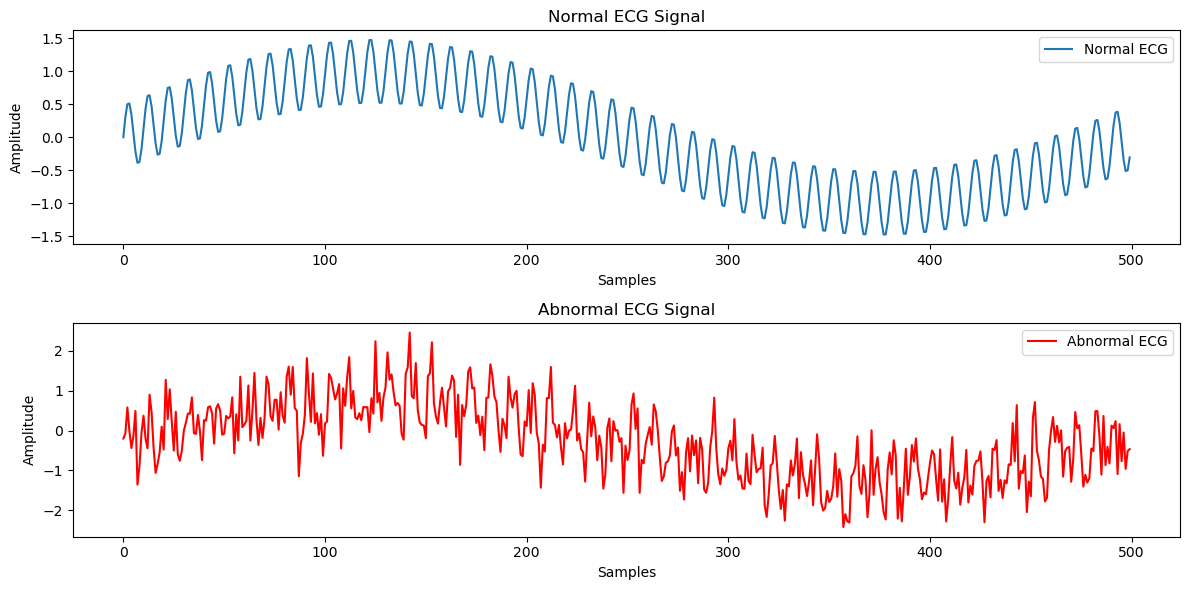

Epoch 1/10


/Users/ohajati/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3646 - loss: 0.9846 - val_accuracy: 0.5625 - val_loss: 0.6390
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7812 - loss: 0.5301 - val_accuracy: 0.9375 - val_loss: 0.4040
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9375 - loss: 0.2947 - val_accuracy: 1.0000 - val_loss: 0.2506
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.1572 - val_accuracy: 1.0000 - val_loss: 0.1441
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0844 - val_accuracy: 1.0000 - val_loss: 0.0806
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0449 - val_accuracy: 1.0000 - val_loss: 0.0454
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0239 - val_accuracy: 1.0000 - val_loss: 0.0264
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0145 - val_accuracy: 1.0000 - val_loss: 0.0163
Epoch 9/10
2/2 ━━━

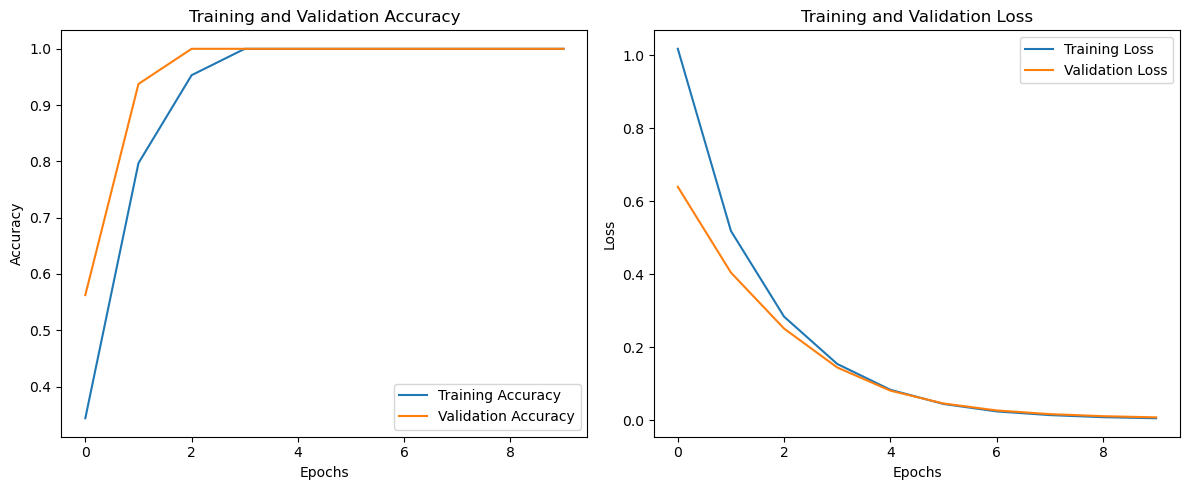

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


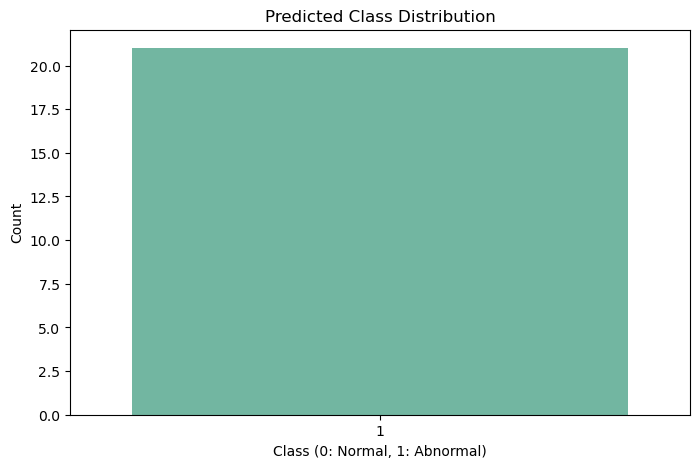

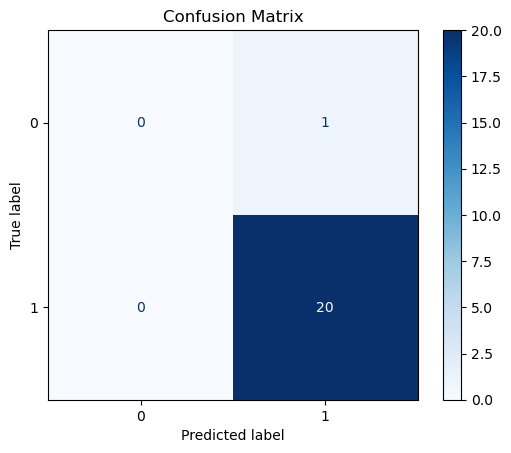

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import seaborn as sns

# Function to generate synthetic ECG-like signals with variability
def generate_ecg_signals(num_samples=1000):
    fs = 500  # Sampling frequency
    t = np.linspace(0, 1, fs, endpoint=False)  # 1 second of data
    normal_ecg = np.sin(2 * np.pi * 1 * t) + 0.5 * np.sin(2 * np.pi * 50 * t)  # Normal ECG
    
    # Generate varied abnormal ECG signals
    abnormal_ecgs = []
    for _ in range(num_samples):
        noise = 0.5 * np.random.normal(size=normal_ecg.shape)
        abnormal_ecg = normal_ecg + noise + np.random.choice([-0.3, 0.3])  # Introduce some shifts
        abnormal_ecgs.append(abnormal_ecg)
        
    abnormal_ecgs = np.array(abnormal_ecgs)

    # Create dataset
    X = np.vstack((normal_ecg, abnormal_ecgs))  # Normal ECG and multiple abnormal ECGs
    y = np.array([0] + [1] * num_samples)  # 0 for normal, 1 for abnormal
    
    return X, y

# Generate the data
X, y = generate_ecg_signals(num_samples=100)

# Visualize some of the signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(X[0], label='Normal ECG')
plt.title('Normal ECG Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(X[1], label='Abnormal ECG', color='red')
plt.title('Abnormal ECG Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

# Preprocessing the data
# Reshape X for model input
X = X.reshape(X.shape[0], -1)  # Reshape for a single feature vector

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a simple neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and save training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

# Visualization of training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Distribution of predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

plt.figure(figsize=(8, 5))
sns.countplot(x=y_pred.flatten(), palette="Set2")
plt.title('Predicted Class Distribution')
plt.xlabel('Class (0: Normal, 1: Abnormal)')
plt.ylabel('Count')
plt.show()

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
